In [15]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
from astropy.table import Table

In [16]:
tab = Table.read ('SMF_Baldry2012.txt', format='ascii.commented_header')
print (tab)

Mass Density 
---- --------
 8.5   0.0192
 8.7    0.018
 8.9   0.0143
 9.1   0.0102
 9.3  0.00959
 9.5  0.00742
 9.7  0.00621
 9.9  0.00571
10.1  0.00551
10.3  0.00548
10.5  0.00512
10.7  0.00355
10.9  0.00241
11.1  0.00127
11.3 0.000338
11.5  4.2e-05
11.7  2.1e-05
11.9    1e-05


# Task 1

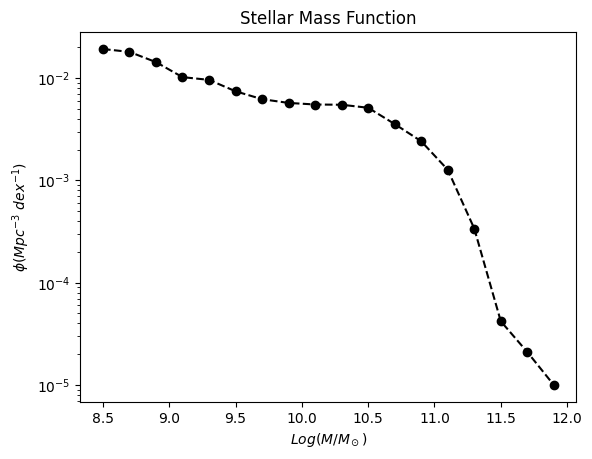

In [17]:
m_star = tab['Mass'] 
nd_star = tab['Density'] #number density
binwidth_star = 0.2 #dex
vol_star = 150**3 #Mpc^3

plt.plot (m_star, nd_star, linestyle = 'dashed', marker = 'o', c='black')
plt.yscale ('log')
plt.xlabel ('$Log(M/M_\odot)$')
plt.ylabel ('$\phi (Mpc^{-3} \ dex^{-1})$')
plt.title ('Stellar Mass Function')
plt.show()


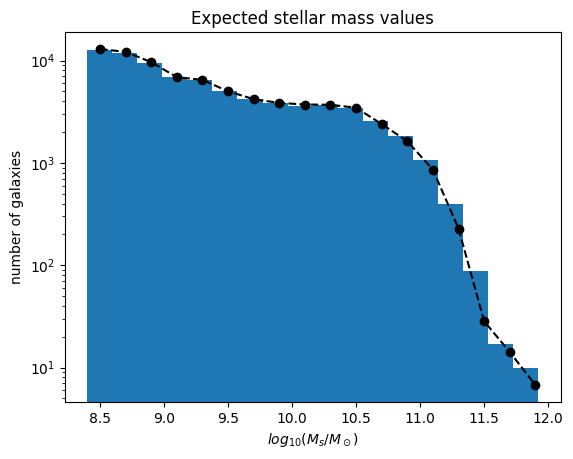

In [18]:
num = nd_star * binwidth_star * vol_star #number of galaxies expected in each bin of mass

sample = []

delta = 0.1

for i in range(len(m_star)):
    for j in range(int(num[i])):
        sample.append(rnd.uniform(m_star[i]-delta, m_star[i]+delta))

plt.hist (sample, bins = len(num))
plt.plot (m_star, num, linestyle = 'dashed', marker = 'o', c='black') #capire se ha senso plottarla
#plt.fill_between (m_star, num-delta, num+delta, alpha = 0.5, color = 'black') #0.1 è minuscolo e non si vede
plt.yscale ('log')
plt.xlabel ('$log_{10}(M_s/M_\odot)$')
plt.ylabel ('number of galaxies')
plt.title ('Expected stellar mass values')
plt.show()

# Task 2

In [19]:
sim = Table.read('MR7_z0.0_L150_h0.7.fits')
print (sim)

TYPE    X         Y        Z            MVIR        INFALLVMAX
---- -------- --------- -------- ------------------ ----------
   0  3.27417  74.68261 17.32758 1152069428571.4287  180.52757
   0  6.09376  80.91196  8.90322 1312528142857.1428  201.70636
   1  9.03828  74.13564  9.15919  53503015714.28572   71.65102
   0  0.94124  70.29736 12.89919 104246828571.42859    87.6633
   1  0.51411  70.06458 12.61891  65848628571.42857   70.21757
   0  13.0589  70.49874 16.80711 1736297714285.7144  199.12184
   2  1.84956  68.39413 11.03614  45289394285.71429   73.36893
   2  5.17399  61.57821  4.86685 233375357142.85718  122.67902
   1  15.8968  70.28729 18.53228  64485917142.85715   72.10719
   2 16.05532  70.29155 18.93444  538076285714.2857  154.58522
 ...      ...       ...      ...                ...        ...
   0 70.49201  87.81304  0.30187 119334428571.42857   80.43822
   0 67.10048  86.93721  0.03711 105618571428.57143   75.02401
   0 78.75689  86.47679  0.54733 131678828571.42859    

In [20]:
m_halo = np.log10(sim['MVIR'])

n_match = min (len(m_halo), len(sample))

m_halo = np.sort (m_halo)[::-1]
sample = np.sort (sample)[::-1]

matched_m_halo = m_halo[:n_match]
matched_m_star = sample[:n_match]

# Task 3

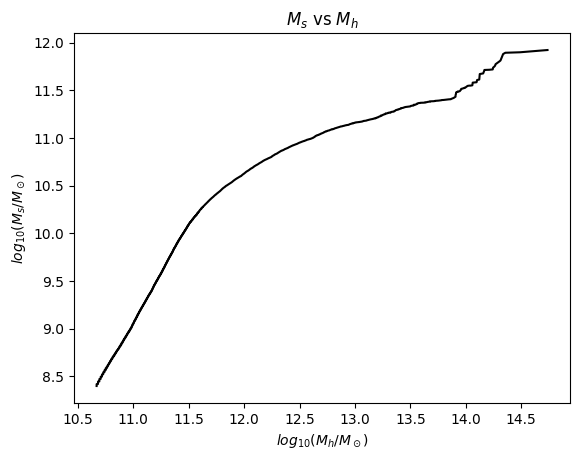

In [21]:
plt.plot (matched_m_halo, matched_m_star, c='black') #, marker='o' #, s=1
plt.xlabel ('$log_{10}(M_h/M_\odot)$')
plt.ylabel ('$log_{10}(M_s/M_\odot)$')
plt.title ('$M_s$ vs $M_h$')
plt.show()

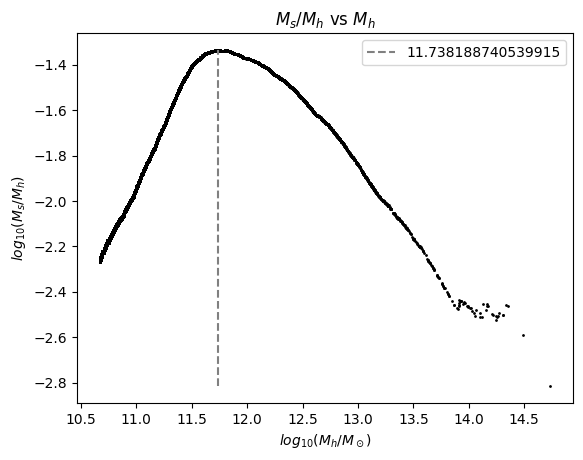

In [22]:
ind_max = np.argmax (matched_m_star - matched_m_halo)

plt.scatter (matched_m_halo, matched_m_star - matched_m_halo, c='black', s=1)
plt.vlines (matched_m_halo[ind_max], np.min(matched_m_star - matched_m_halo), np.max(matched_m_star - matched_m_halo), color='grey', ls='--', label=matched_m_halo[ind_max])
plt.xlabel ('$log_{10}(M_h/M_\odot)$')
plt.ylabel ('$log_{10}(M_s/M_h)$')
plt.title ('$M_s/M_h$ vs $M_h$')
#plt.ylim(-2.75, -0.75)
#plt.yscale ('log')
plt.legend()
plt.show()

Omega_dm 0.265
Omega_b/Omega_dm 0.16981132075471697


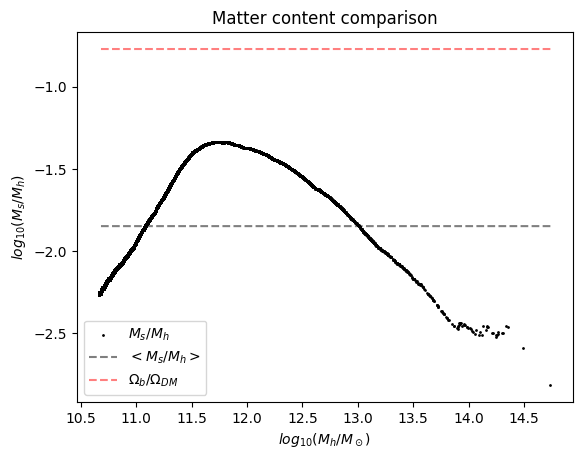

In [23]:
omega_b = 0.045
omega_m = 0.31
omega_dm = omega_m - omega_b
omega_ratio = np.ones (len(matched_m_halo)) * (omega_b/omega_dm)
mean_mass_ratio = np.ones (len(matched_m_halo)) * np.mean (matched_m_star - matched_m_halo)

print ('Omega_dm', omega_dm)
print ('Omega_b/Omega_dm', omega_b / omega_dm)

plt.scatter (matched_m_halo, matched_m_star - matched_m_halo, label = '$M_s/M_h$', c='black', s=1)
plt.plot (matched_m_halo, mean_mass_ratio, linestyle='dashed', c='black', alpha=0.5, label = '$< M_s/M_h>$')
plt.plot (matched_m_halo, np.log10(omega_ratio), linestyle='dashed', c='red', alpha=0.5, label = '$\Omega_b/\Omega_{DM}$')
plt.ylabel ('$log_{10}(M_s/M_h)$')
plt.xlabel ('$log_{10}(M_h/M_\odot)$')
plt.title ('Matter content comparison')
plt.legend()
plt.show()

# Task 4

In [24]:
tng = Table.read ('TNG_Mhalo_Mstar_h0.7.fits')
print(tng.colnames)

['Mhalo', 'Mstar']


In [25]:
Mh_tng = tng['Mhalo']
Ms_tng = tng['Mstar']

n_match_tng = min (len(Mh_tng), len(Ms_tng))

Mh_tng = np.sort (Mh_tng)[::-1]
Ms_tng = np.sort (Ms_tng)[::-1]

matched_Mh_tng = Mh_tng[:n_match]
matched_Ms_tng = Ms_tng[:n_match]

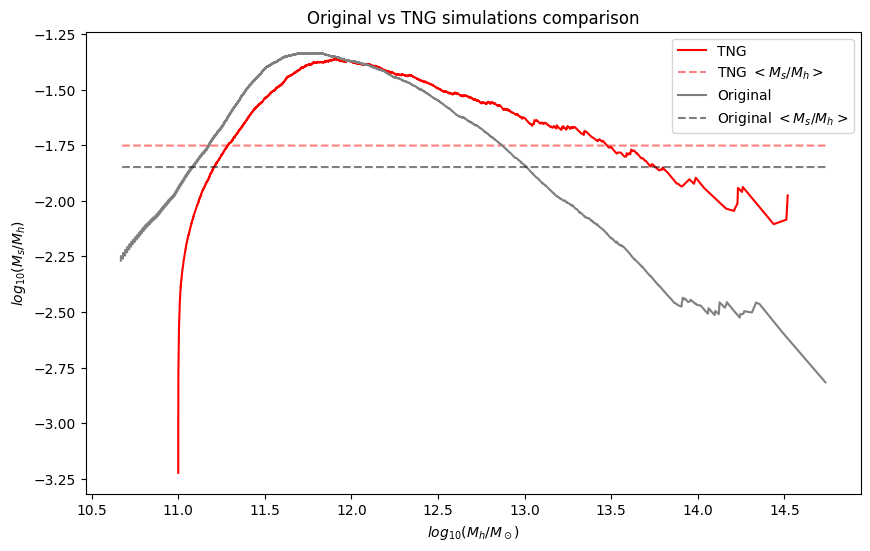

In [26]:
TNG_s_h_mean = np.ones (len(matched_m_halo)) * np.mean (matched_Ms_tng - matched_Mh_tng)

plt.figure(figsize=(10,6))
plt.plot (matched_Mh_tng, matched_Ms_tng - matched_Mh_tng, c='red', label='TNG')
plt.plot (matched_m_halo, TNG_s_h_mean, c='red', ls='dashed', alpha=0.5, label = 'TNG $<M_s/M_h>$')
plt.plot (matched_m_halo, matched_m_star - matched_m_halo, c='grey', label = 'Original') #, ls='dashed'
plt.plot (matched_m_halo, mean_mass_ratio, linestyle='dashed', c='black', alpha=0.5, label = 'Original $< M_s/M_h>$')
plt.xlabel ('$log_{10}(M_h/M_\odot)$')
plt.ylabel ('$log_{10}(M_s/M_h)$')
plt.title ('Original vs TNG simulations comparison')
plt.legend()
plt.show()

## Optional task

In [27]:
print (sim.colnames)

['TYPE', 'X', 'Y', 'Z', 'MVIR', 'INFALLVMAX']


In [28]:
v_inf = sim['INFALLVMAX']

n_match2 = min(len(v_inf), len(sample))

sorted_sample = np.sort(sample)[::-1]
sorted_v_inf_args = np.argsort(v_inf)[::-1]
sorted_m_halo2 = sim['MVIR'][sorted_v_inf_args]

matched_m_star2 = sorted_sample[:n_match2]
matched_v_inf = sorted_v_inf_args[:n_match2]
matched_m_halo2 = np.log10(sorted_m_halo2[:n_match2])

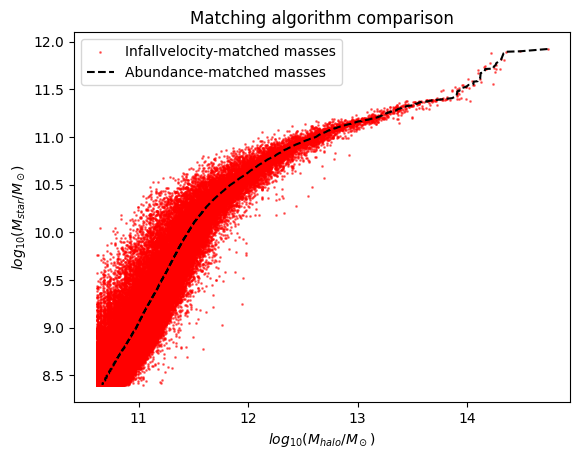

In [30]:
plt.scatter (matched_m_halo2, matched_m_star2, c='red', s=1, alpha=0.5, label='Infallvelocity-matched masses')
plt.plot (matched_m_halo, matched_m_star, c='black', ls='--', label='Abundance-matched masses')
plt.xlabel('$log_{10}(M_{halo}/M_\odot)$')
plt.ylabel('$log_{10}(M_{star}/M_\odot)$')
plt.title('Matching algorithm comparison')
plt.legend()
plt.show()